# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
data = pd.read_csv ('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Всего в DF 23 699 строк и 22 столбца. В названиях столбцов лишних пробелов нет, названия записаны прописью. Типы данных: целочисленные, численные и булевые. Пристутствуют пропуски и аномальные значения в данных. 

## Предобработка данных

In [5]:
data[data['rooms'] == 0] # проверка объектов с количеством комнат равному "0"

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,NaN,24.0,18.00,4,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,NaN,9.0,18.00,8,NaN,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [6]:
rooms_null = data[data['rooms'] == 0] # проверка объектов с количеством комнат равному "0"
rooms_null.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 144 to 23637
Data columns (total 22 columns):
total_images            197 non-null int64
last_price              197 non-null float64
total_area              197 non-null float64
first_day_exposition    197 non-null object
rooms                   197 non-null int64
ceiling_height          82 non-null float64
floors_total            194 non-null float64
living_area             183 non-null float64
floor                   197 non-null int64
is_apartment            6 non-null object
studio                  197 non-null bool
open_plan               197 non-null bool
kitchen_area            0 non-null float64
balcony                 126 non-null float64
locality_name           197 non-null object
airports_nearest        118 non-null float64
cityCenters_nearest     118 non-null float64
parks_around3000        118 non-null float64
parks_nearest           29 non-null float64
ponds_around3000        118 non-null float64
ponds_neares

In [7]:
data[(data['rooms'] == 0)&(data['studio'] == False)] # все ли они являются студиями ?

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.0,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.3,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
780,9,2600000.0,26.10,2018-02-20T00:00:00,0,NaN,18.0,NaN,8,NaN,...,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.70,5.0,15.0,3,False,...,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.00,2016-09-27T00:00:00,0,NaN,27.0,18.0,7,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
1574,0,2200000.0,22.00,2017-11-03T00:00:00,0,NaN,18.0,15.0,16,NaN,...,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0
1625,7,1980000.0,23.98,2018-02-01T00:00:00,0,NaN,4.0,10.5,3,NaN,...,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2532,5,3500000.0,27.10,2018-02-01T00:00:00,0,NaN,18.0,18.7,9,NaN,...,NaN,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0
3019,18,2100000.0,24.00,2017-11-10T00:00:00,0,NaN,10.0,18.0,6,NaN,...,NaN,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4115,7,2600000.0,24.00,2018-02-01T00:00:00,0,NaN,25.0,18.0,4,NaN,...,NaN,2.0,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0


Как видно, все вышеперечисенные объекты по всем параметрам должны быть студиями, но не это не так. Исправим это.

In [8]:
data.loc[data['rooms'] == 0, 'studio'] = True # исправили объекты с количесвтом комнат = "0" на студии
data[(data['rooms'] == 0) & (data['studio'] == False)] # проверка на внесенные изменнеия, все хорошо.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Проанализировав данные можно сказать, что высота потолков (ceiling_height) имеет пропуски, согласно действующему СНИП - минимальная высота 2.5 метра, максимальная высота не регламентируется (возьмем не более 8 метров). 
Все  выбивающиеся результаты заменяем на медиану и показываем на гистограмме.

Text(0.5, 0, 'Высота потолка м.')

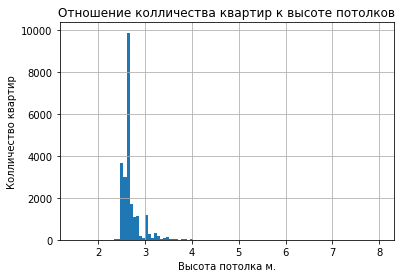

In [77]:
data['ceiling_height'].hist(bins=100, range=(1.5, 8)) 
plt.title("Отношение колличества квартир к высоте потолков")
plt.ylabel("Колличество квартир")
plt.xlabel("Высота потолка м.")

По гистограмме видно, что пик приходится на высоту 2,5 метра, заменяем пропуски медианой, так как существуют сильно выделяющиеся значения

In [10]:
height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(height_median)
data['ceiling_height'].isna().value_counts()

False    23699
Name: ceiling_height, dtype: int64

In [11]:
data.head(10) # Выполнили проверку на отсутстие пропусков, как видим - пропусков не осталось, заменены медианой.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Число пропущенных "всего этажей в доме" (floors_total)  невозможно определить исходя из данных. Их нужно будет учесть в анализе. Количество пропусков незначительно (меньше 100 или менее 0,5%), заменим на медиану высоты в населенном пункте.

In [12]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)
data['floors_total'] = data['floors_total'].fillna(0)
data['floors_total'] = data['floors_total'].astype('int')
floors_total_med = dict(data.pivot_table(index = 'locality_name', values = 'floors_total', aggfunc = 'median')['floors_total'])
type(floors_total_med)
def floors_total_fun(row):
    loc_name = row['locality_name']
    fl_total = row['floors_total']
    if fl_total == 0:
        for key, value in floors_total_med.items():
            if key in loc_name:
                return value
    
    return fl_total
data['floors_total'] = data.apply(floors_total_fun, axis=1)

In [13]:
data['floors_total'].isna().value_counts() # проверим floors_total на отсутствие пропусков

False    23650
Name: floors_total, dtype: int64

Пропуски жилой площади (living_area) предлагается заменить на отношение средней жилой площади к жилой площади по строке, для оценки правильности предлагаемого решения построим график

Text(0.5, 0, 'Жилая')

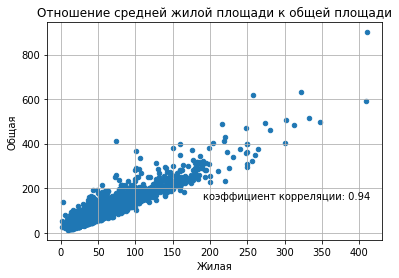

In [14]:
data.plot(x='living_area', y='total_area', kind='scatter', grid=True) 
plt.text(190, 150, 'коэффициент корреляции: ' + str(round(data['living_area'].corr(data['total_area']), 2)))
plt.title("Отношение средней жилой площади к общей площади")
plt.ylabel("Общая")
plt.xlabel("Жилая")

По диаграмме рассеивания и коэффециенту корреляции видна линейная зависимость отношения общей к средней жилой площади, поэтому необходимо заменить пропуски на среднее значение. Проверяем на  отсутствие пропусков.

In [15]:
mean_living_area = (data['living_area'] / data['total_area']).mean()
data['living_area'] = data['living_area'].fillna(round((data['total_area'] *mean_living_area), 1))
data['living_area'].isna().value_counts()

False    23650
Name: living_area, dtype: int64

Пропуски площади кухни (kitchen_area) так же планируется заменить на отношение средней площади кухни к жилой площади по строке.

Text(0.5, 0, 'Кухня')

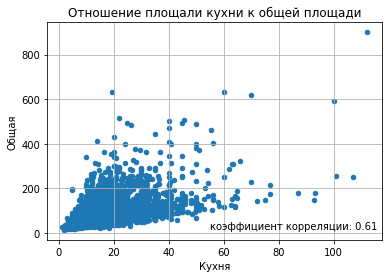

In [16]:
data.plot(x='kitchen_area', y='total_area', kind='scatter', grid=True) 
plt.text(55, 20, 'коэффициент корреляции: ' + str(round(data['kitchen_area'].corr(data['total_area']), 2)))
plt.title("Отношение площали кухни к общей площади")
plt.ylabel("Общая")
plt.xlabel("Кухня")

Коэффециент корреляции равен 0,61, говорит о том есть зависимость размера кухни к общей площади квартиры, но она не очень сильная и положительная. Заменим пропуски на средние. Выполним проверку на отсутствие пропусков.

In [17]:
mean_kitchen_area = (data['kitchen_area'] / data['total_area']).mean()
data['kitchen_area'] = data['kitchen_area'].fillna(round((data['total_area'] *mean_kitchen_area), 1))
data['kitchen_area'].isna().value_counts()

False    23650
Name: kitchen_area, dtype: int64

Площади кухонь в студиях присвоим значение "0" и проверим что получилось

In [18]:
data.loc[data['studio'] == True, 'kitchen_area'] = 0
data.loc[data['studio'] == True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.50,2,NaN,...,0.0,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.65,14.0,17.00,1,NaN,...,0.0,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.75,4,NaN,...,0.0,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.65,26.0,24.30,19,NaN,...,0.0,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.65,10.0,14.10,7,NaN,...,0.0,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23162,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.65,25.0,18.00,16,NaN,...,0.0,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23393,0,2500000.0,27.70,2017-09-28T00:00:00,0,2.65,24.0,18.00,4,NaN,...,0.0,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23505,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.65,19.0,14.70,8,NaN,...,0.0,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23543,10,1450000.0,29.00,2017-11-11T00:00:00,0,2.65,9.0,18.00,8,NaN,...,0.0,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


Выполним проверку на условие - есть ли квартиры, где сумма жилой площади и кухни больше общей ?

In [19]:
data.query('total_area < (living_area+kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,...,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
424,14,11500000.0,98.00,2016-05-10T00:00:00,3,2.65,3.0,88.00,3,False,...,18.40,1.0,Санкт-Петербург,39363.0,13270.0,0.0,NaN,0.0,NaN,90.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,2.65,18.0,20.00,9,NaN,...,5.00,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,NaN,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,NaN,...,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22050,6,2194000.0,36.50,2017-09-27T00:00:00,1,2.65,3.0,33.20,3,NaN,...,6.80,0.0,Санкт-Петербург,39446.0,18500.0,0.0,NaN,2.0,639.0,36.0
22860,9,65000000.0,228.00,2016-06-02T00:00:00,4,2.65,5.0,200.00,2,NaN,...,42.70,NaN,Санкт-Петербург,22783.0,1295.0,3.0,619.0,3.0,269.0,NaN
23054,0,5800000.0,66.00,2017-06-09T00:00:00,5,2.65,5.0,55.50,1,NaN,...,12.40,0.0,Санкт-Петербург,12007.0,11933.0,0.0,NaN,0.0,NaN,21.0
23143,3,1900000.0,18.90,2016-04-04T00:00:00,1,2.65,16.0,16.00,12,NaN,...,3.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,115.0


Таких получили 103 объекта, эти ошибки можно отнести к ошибочным вводимым данным.Перезапишем данные и проверим предыдущее условие.

In [20]:
data = data.query('total_area > (living_area+kitchen_area)')
data.query('total_area < (living_area+kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Значений по балконам (balcony) пропущено практически половину, заполним пропуски "0" и выполним проверку после этого.

In [ ]:
warnings.simplefilter('ignore')
zero = 0
data['balcony'] = data['balcony'].fillna(zero)
data['balcony'].isna().value_counts()

Пропусков в locality_name — название населённого пункта пракически нет, как то восстановить данные не предоставляется возможным, локализация крайне важна при оценке, поэтому удалим пропуски и проверим что все сделано верно 

In [22]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23474 entries, 0 to 23473
Data columns (total 22 columns):
total_images            23474 non-null int64
last_price              23474 non-null float64
total_area              23474 non-null float64
first_day_exposition    23474 non-null object
rooms                   23474 non-null int64
ceiling_height          23474 non-null float64
floors_total            23474 non-null float64
living_area             23474 non-null float64
floor                   23474 non-null int64
is_apartment            2727 non-null object
studio                  23474 non-null bool
open_plan               23474 non-null bool
kitchen_area            23474 non-null float64
balcony                 23474 non-null float64
locality_name           23474 non-null object
airports_nearest        18001 non-null float64
cityCenters_nearest     18024 non-null float64
parks_around3000        18025 non-null float64
parks_nearest           8007 non-null float64
ponds_around300

Определим количество пропуков cityCenters_nearest до центра и непосредственно в городе Санкт-Петербурга

In [23]:
data['cityCenters_nearest'].isna().sum()

5450

In [24]:
data[(data['locality_name'] == 'Санкт-Петербург') & (data['cityCenters_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
81,9,10949000.0,68.00,2018-12-27T00:00:00,1,2.65,10.0,38.4,6,NaN,...,12.7,0.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
588,20,4200000.0,38.30,2019-04-16T00:00:00,1,2.60,16.0,19.8,10,NaN,...,10.1,2.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,11,9899000.0,101.00,2018-12-12T00:00:00,3,3.00,5.0,62.0,3,NaN,...,15.0,0.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,7,37000000.0,161.00,2016-05-22T00:00:00,3,2.65,9.0,84.0,8,NaN,...,30.2,0.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,402.0
788,19,7100000.0,59.60,2019-02-13T00:00:00,2,3.40,5.0,36.6,2,NaN,...,12.5,0.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21467,9,4500000.0,34.30,2019-03-04T00:00:00,1,2.65,9.0,17.5,3,NaN,...,8.9,1.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21676,15,44500000.0,169.00,2019-02-28T00:00:00,3,3.30,9.0,101.0,7,NaN,...,18.0,4.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21748,19,130000000.0,431.00,2017-10-02T00:00:00,7,3.70,8.0,220.0,5,NaN,...,20.0,5.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,161.0
22341,5,3415000.0,31.65,2019-04-16T00:00:00,1,2.65,24.0,17.9,14,NaN,...,8.7,2.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Возможно вне города Санкт-Петербург вообще не отмечен центр ?

In [25]:
data[data['locality_name'] != 'Санкт-Петербург'].count()

total_images            7860
last_price              7860
total_area              7860
first_day_exposition    7860
rooms                   7860
ceiling_height          7860
floors_total            7860
living_area             7860
floor                   7860
is_apartment             915
studio                  7860
open_plan               7860
kitchen_area            7860
balcony                 7860
locality_name           7860
airports_nearest        2472
cityCenters_nearest     2471
parks_around3000        2472
parks_nearest            777
ponds_around3000        2472
ponds_nearest           1100
days_exposition         6768
dtype: int64

Значений стало гораздо меньше, но все таки центр в данных отмечается. Предполагаю, что расстояние до центра важно только в городе Санкт-Петербург, поэтому где оно не проставлено, определить не получиться и значит должно быть удалено.

In [26]:
data = data[(data['locality_name'] != 'Санкт-Петербург') 
            | ((data['locality_name'] == 'Санкт-Петербург') 
               & (~data['cityCenters_nearest'].isna()))].reset_index(drop=True)

Для отсавшихся параметров заменим значения на "0" и "false" 

In [27]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['days_exposition'] = data['days_exposition'].fillna(0)
data.dropna(subset = ['floors_total'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23413 entries, 0 to 23412
Data columns (total 22 columns):
total_images            23413 non-null int64
last_price              23413 non-null float64
total_area              23413 non-null float64
first_day_exposition    23413 non-null object
rooms                   23413 non-null int64
ceiling_height          23413 non-null float64
floors_total            23413 non-null float64
living_area             23413 non-null float64
floor                   23413 non-null int64
is_apartment            23413 non-null bool
studio                  23413 non-null bool
open_plan               23413 non-null bool
kitchen_area            23413 non-null float64
balcony                 23413 non-null float64
locality_name           23413 non-null object
airports_nearest        18001 non-null float64
cityCenters_nearest     18024 non-null float64
parks_around3000        23413 non-null float64
parks_nearest           8007 non-null float64
ponds_around3000

Почистим данные по регистру и сделаем целочисленными, так как точность до сантиметров не нужна

In [28]:
data['floors_total'] = data['floors_total'].astype('int')# этажи должны быть целочисленными (1,2,3 и т.д.)
data['last_price'] = data['last_price'].astype('int') # Цена без копеек
data['balcony'] = data['balcony'].astype('int') # Любой балкон это балкон
data['parks_around3000'] = data['parks_around3000'].astype('int') # Точность до метра
data['ponds_around3000'] = data['ponds_around3000'].astype('int') # Точность до метра
data['locality_name'] = data['locality_name'].str.lower() # Приведено к нижнему регистру, так как данные очень важны, хотя визуально отклонений не замечено
data['days_exposition'] = data['days_exposition'].astype('int') # Удобнее оперировать целыми днями

Уберем пропуски airports_nearest — расстояние до ближайшего аэропорта в метрах (м) и выполним проверку все ли в порядке

In [78]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data['airports_nearest'] = data['airports_nearest'].astype('int')
air_med = dict(data.pivot_table(index = 'locality_name', values = 'airports_nearest', aggfunc = 'median')['airports_nearest'])
type(air_med)
def air_nearest(row):
    loc_name = row['locality_name']
    air_nearest = row['airports_nearest']
    if air_nearest == 0:
        for key, value in air_med.items():
            if key in loc_name:
                return value
    
    return air_nearest
data['airports_nearest'] = data.apply(air_nearest, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23413 entries, 0 to 23412
Data columns (total 29 columns):
total_images            23413 non-null int64
last_price              23413 non-null int64
total_area              23413 non-null float64
first_day_exposition    23413 non-null object
rooms                   23413 non-null int64
ceiling_height          23413 non-null float64
floors_total            23413 non-null int64
living_area             23413 non-null float64
floor                   23413 non-null int64
is_apartment            23413 non-null bool
studio                  23413 non-null bool
open_plan               23413 non-null bool
kitchen_area            23413 non-null float64
balcony                 23413 non-null int64
locality_name           23413 non-null object
airports_nearest        23413 non-null float64
cityCenters_nearest     18024 non-null float64
parks_around3000        23413 non-null int64
parks_nearest           8007 non-null float64
ponds_around3000        

## Расчёты и добавление результатов в таблицу

Добавим новый параметр стоимость квадратного метра

In [30]:
data['price_m2'] = round(data['last_price'] / data['total_area'], 2)

Добавим день, месяц и год публикации

In [31]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # для дробления на месяцы дни и годы необходимо перевести в формат даты
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data['first_day_exposition'] = data['first_day_exposition'].dt.date # переводим в целое число

Разобъем по категориям - этаж квартиры (первый, последний, другой):

In [32]:
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
data.loc[data['floor_category'].isna(), 'floor_category'] = 'другой'

Соотношение жилой и общей площади, а также отношение площади кухни к общей:

In [33]:
data['living_area_ratio'] = round(data['living_area'] / data['total_area'], 3)
data['kitchen_area_ratio'] = round(data['kitchen_area'] / data['total_area'], 3)

In [34]:
data.info() # проверим добавленные столбцы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23413 entries, 0 to 23412
Data columns (total 29 columns):
total_images            23413 non-null int64
last_price              23413 non-null int64
total_area              23413 non-null float64
first_day_exposition    23413 non-null object
rooms                   23413 non-null int64
ceiling_height          23413 non-null float64
floors_total            23413 non-null int64
living_area             23413 non-null float64
floor                   23413 non-null int64
is_apartment            23413 non-null bool
studio                  23413 non-null bool
open_plan               23413 non-null bool
kitchen_area            23413 non-null float64
balcony                 23413 non-null int64
locality_name           23413 non-null object
airports_nearest        23413 non-null float64
cityCenters_nearest     18024 non-null float64
parks_around3000        23413 non-null int64
parks_nearest           8007 non-null float64
ponds_around3000        

## Исследовательский анализ данных

### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

#### Площадь

13.0
900.0


(0, 300)

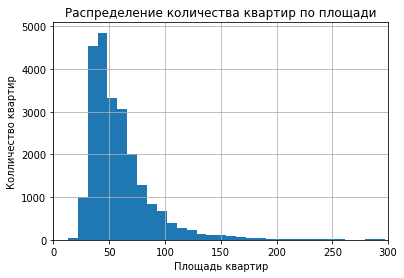

In [35]:
data['total_area'].hist(bins=100)
print(data['total_area'].min())
print(data['total_area'].max())
plt.title("Распределение количества квартир по площади")
plt.ylabel("Колличество квартир")
plt.xlabel("Площадь квартир")
plt.xlim(0, 300)

(0, 200)

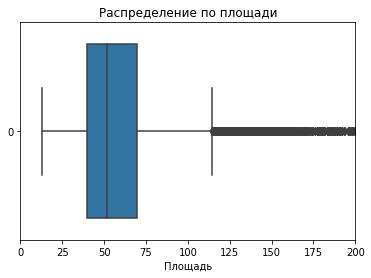

In [36]:
sns.boxplot(data=data['total_area'], orient="h")
plt.title("Распределение по площади")
plt.xlabel("Площадь")
plt.xlim(0, 200)

По данному графику нельзя точно определить размах, напишем функцию для этого 

In [37]:
def Span_charts(column):
    stat = data[column].describe()
    quantile = stat[6] - stat[4]     
    left_mustache = round(stat[4] - 1.5 * quantile, 2)
    right_mustache = round(stat[6] + 1.5 * quantile, 2)
    if left_mustache < stat[3]:
        left_mustache = stat[3] 
    if right_mustache > stat[7]:
        right_mustache = stat[7]
        
    return [left_mustache, right_mustache]
Span_charts('total_area')

[13.0, 114.25]

Границы размаха составляют : 13 и 114,25

Проанализиров гистограмму можно сказать, что квартир с площадью более 300 м2 практически нет. В целом нехарактерные значения начинаются от 115 м2.

Построим гисраграмму использовав данные о границах размаха

Text(0.5, 0, 'Площадь квартир')

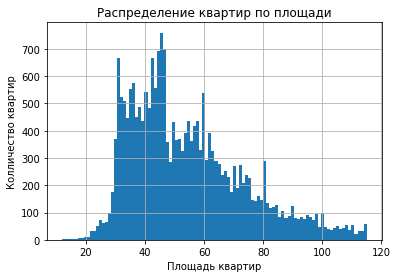

In [38]:
data['total_area'].hist(bins=100, range=(12.0, 115))
plt.title("Распределение квартир по площади")
plt.ylabel("Колличество квартир")
plt.xlabel("Площадь квартир")

Создадим data_good удобные для анализа на основе границ выбивающихся данных, в дальнейшем будем их дополнять.

In [39]:
data_good = data.query('total_area <= 114.25')

#### Цена

12190
763000000


Text(0.5, 0, 'Цены')

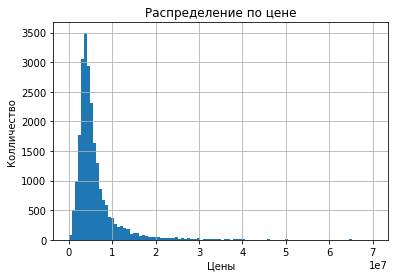

In [40]:
data['last_price'].hist(bins=100, range=(0, 70075000.0))
print(data['last_price'].min())
print(data['last_price'].max())
plt.title("Распределение по цене")
plt.ylabel("Колличество")
plt.xlabel("Цены")

Гистограмма совсем неинформативна, понятно, что недвижимости дороже 42 миллионов крайне мало. Необходимо убрать выбибивающиеся значения.

Построим квадратный график

(0, 14775000.0)

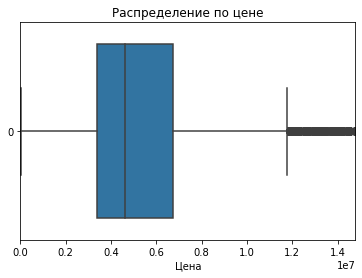

In [41]:
sns.boxplot(data=data['last_price'], orient="h")

plt.title("Распределение по цене")
plt.xlabel("Цена")
plt.xlim(0, 14775000.0)

In [42]:
Span_charts('last_price') # определим четкие границы размаха используя функцию Span_charts

[12190.0, 11775000.0]

In [43]:
data_good = data_good.query('last_price < 11775000.0') # добавим новые найденные границы в данные


#### Число комнат

0
19


Text(0.5, 0, 'Число комнат')

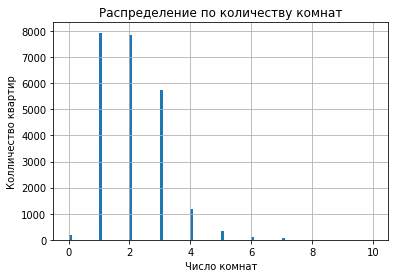

In [44]:
data['rooms'].hist(bins=100, range=(0, 10))
print(data['rooms'].min())
print(data['rooms'].max())
plt.title("Распределение по количеству комнат")
plt.ylabel("Колличество квартир")
plt.xlabel("Число комнат")

(0, 10)

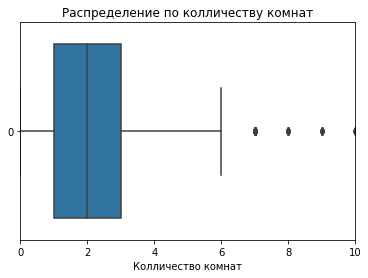

In [45]:
sns.boxplot(data=data['rooms'], orient="h")
Span_charts('rooms')
plt.title("Распределение по колличеству комнат")
plt.xlabel("Колличество комнат")
plt.xlim(0, 10)

Проанализировав данные можно сказать, что количество квартир с числом комнат более 6 очень мало, внесем эти сведения в данные

In [46]:
data_good = data_good.query('rooms < 7')

#### Высота потолков

1.0
32.0


Text(0.5, 0, 'Высота потолков')

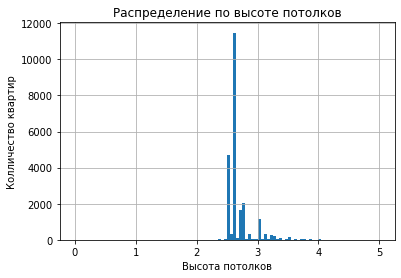

In [47]:
data['ceiling_height'].hist(bins=100, range=(0, 5))
print(data['ceiling_height'].min())
print(data['ceiling_height'].max())
plt.title("Распределение по высоте потолков")
plt.ylabel("Колличество квартир")
plt.xlabel("Высота потолков")

Для анализа возьмем высоту потолков не более 5 метров и построим диаграмму размаха

(2.2, 3)

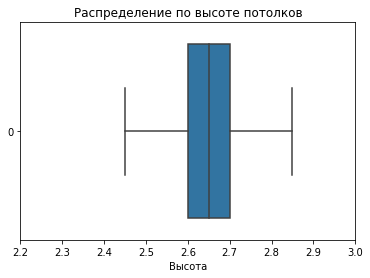

In [79]:
sns.boxplot(data=data['ceiling_height'], orient="h", showfliers=False)
Span_charts('ceiling_height')
plt.title("Распределение по высоте потолков")
plt.xlabel("Высота")
plt.xlim(2.2, 3)

In [49]:
Span_charts('ceiling_height') # определим четкие границы размаха используя функцию Span_charts

[2.45, 2.85]

In [50]:
data_good = data_good.query('ceiling_height < 2.9') # добавим новые найденные границы в данные

In [51]:
round(len(data_good)/len(data), 2)*100 # проверка, сколько отсалось данных в процентах после внесения уточнений и отсекания выбросов

83.0

Осталось 83 % данных

### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Построим количество дней продажи квартиры

(0, 1500)

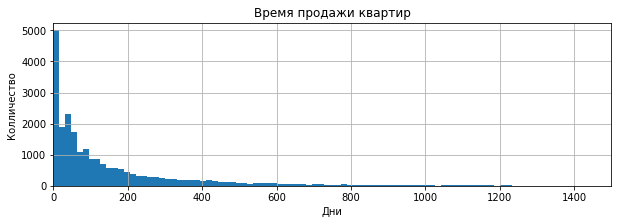

In [52]:
data['days_exposition'].hist(bins=100, figsize=(10, 3))
plt.title("Время продажи квартир")
plt.ylabel("Колличество")
plt.xlabel("Дни")
plt.xlim(0, 1500)

Построим диаграмму размаха и определим точные границы

Text(0.5, 0, 'Дни')

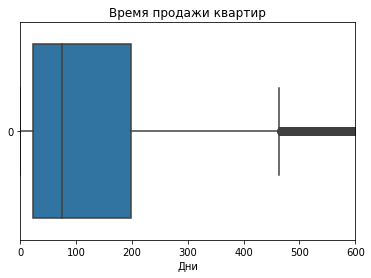

In [53]:
sns.boxplot(data=data['days_exposition'], orient="h")
plt.xlim(0, 600)
plt.title("Время продажи квартир")
plt.xlabel("Дни")

In [54]:
Span_charts('days_exposition')

[0.0, 463.0]

In [55]:
data['days_exposition'].describe()

count    23413.000000
mean       156.915773
std        213.896773
min          0.000000
25%         23.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Судя по полученным данным, продажа в среднем занимает 74 дней или 2.5 месяца.
Если квартира продана за 23 дня считайте, это очень хорошо (возможно вы оценили квартиру ниже рынка, надо не забыть это проверить)
Если же квартира не продалась за 199 дней, то что-то не так, это слишком долго.

In [56]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,0,120370.37,3,3,2019,другой,0.472,0.231
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,NaN,81,82920.79,1,12,2018,первый,0.460,0.272
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558,92785.71,3,8,2015,другой,0.612,0.148
3,0,64900000,159.0,2015-07-24,3,2.65,14,89.8,9,False,...,3,234.0,424,408176.10,4,7,2015,другой,0.565,0.187
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121,100000.00,1,6,2018,другой,0.320,0.410


### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Выбивающиеся значения были определены сразу на графиках и создана -  Хорошая дата = data.query('левый ус <= Столбец <= правый ус') round(len(data_good)/len(data), 2)*100. Осталось 83 % данных.

Статистически редко встречающиеся параметры продаваемых квартир:

- площадью более 114.25 кв. м
- 7 комнат и более 
- продажа квартир с высотой потолков менее 2.5 метров незаконна, более 3.22 м встречаются не часто.
- цена более 11,7 млн рублей
- проданные за 428 дней или более

### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Создадим матрицу диаграмм для изучения вышеизложенных параметров

                total_area  last_price     rooms  ceiling_height
total_area        1.000000    0.677083  0.802410        0.127256
last_price        0.677083    1.000000  0.412228        0.243280
rooms             0.802410    0.412228  1.000000       -0.100313
ceiling_height    0.127256    0.243280 -0.100313        1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37698ea910>,
      dtype=object)

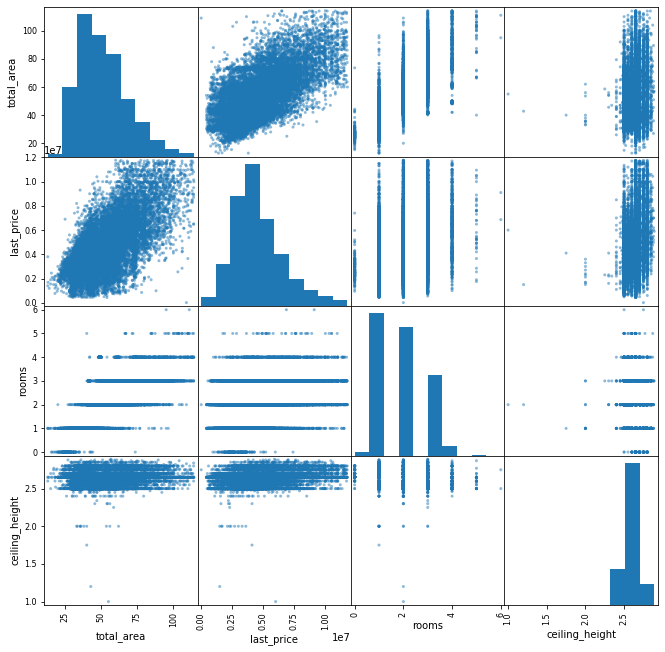

In [57]:
data_good_stat = data_good.loc[:, ['total_area', 'last_price', 'rooms', 'ceiling_height']]
print(data_good_stat.corr())
pd.plotting.scatter_matrix(data_good_stat, figsize=(11, 11))

Определим зависимость цены от площади квартиры и от расстояния до центра города

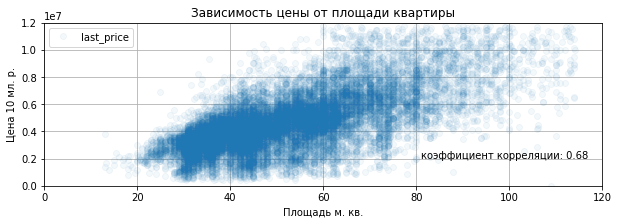

In [58]:
data_good.sort_values('total_area').plot(
    x='total_area', 
    y='last_price', 
    style='o', 
    grid=True, 
    figsize=(10, 3), 
    alpha=0.05,  
    ylim=(0,12000000), 
    xlim=(0,120)    
)
plt.title("Зависимость цены от площади квартиры")
plt.xlabel("Площадь м. кв.")
plt.ylabel("Цена 10 мл. р.")
plt.text(81, 2000000, 'коэффициент корреляции: ' + str(round(data_good['last_price'].corr(data_good['total_area']), 2)))
plt.show()

Определим зависимость цены от числа комнат

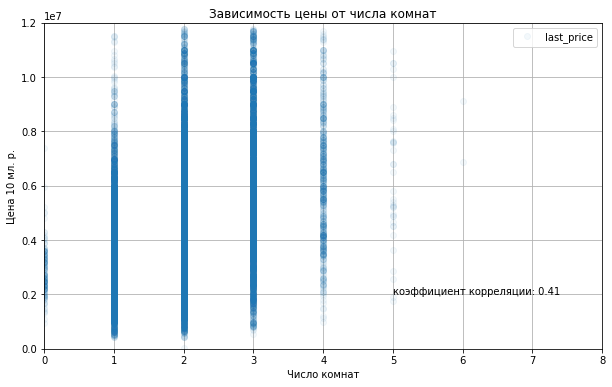

In [59]:
data_good.sort_values('rooms').plot(
    x='rooms', 
    y='last_price', 
    style='o', 
    grid=True, 
    figsize=(10, 6), 
    alpha=0.05,  
    ylim=(0,12000000), 
    xlim=(0,8)    
)
plt.title("Зависимость цены от числа комнат")
plt.xlabel("Число комнат")
plt.ylabel("Цена 10 мл. р.")
plt.text(5, 2000000, 'коэффициент корреляции: ' + str(round(data_good['last_price'].corr(data_good['rooms']), 2)))
plt.show()

Определим зависимость цены от удаленности от центра

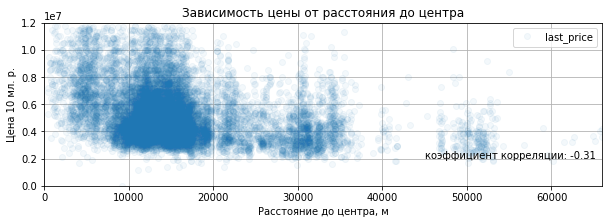

In [60]:
data_good.sort_values('cityCenters_nearest').plot(
    x='cityCenters_nearest', 
    y='last_price', 
    style='o', 
    grid=True, 
    figsize=(10, 3), 
    alpha=0.05,  
    ylim=(0,12000000), 
    xlim=(0,66000)    
)
plt.title("Зависимость цены от расстояния до центра")
plt.xlabel("Расстояние до центра, м")
plt.ylabel("Цена 10 мл. р.")
plt.text(45000, 2000000, 'коэффициент корреляции: ' + str(round(data_good['last_price'].corr(data_good['cityCenters_nearest']), 2)))
plt.show()

Определим зависимость от этажа

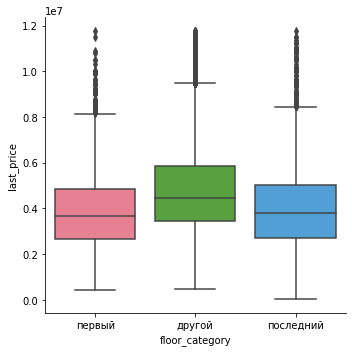

In [61]:
sns.catplot(x="floor_category", y="last_price", kind="box", data=data_good, palette='husl')

Определим зависимость от дня недели, месяца и года

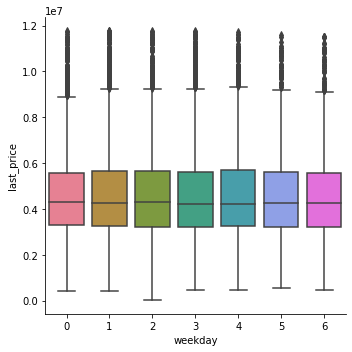

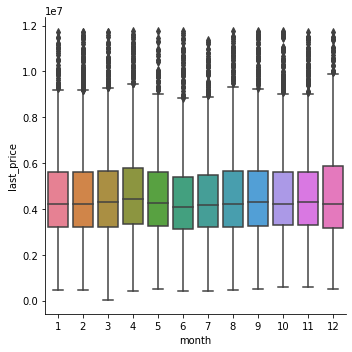

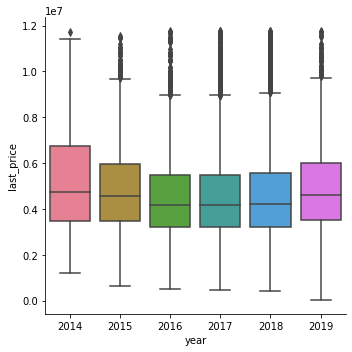

In [62]:
for column in ['weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=data_good, palette='husl') # через seaborn  визально более наглядно

Факторы, влияющие на стоимость квартиры
Наиболее сильно влияет на стоимость квартиры ее площадь (коэффициент корреляции 0,66).
В меньшей степени, но все равно достаточно сильно стоимость квартиры зависит от числа комнат. (коэффициент корреляции 0,43).
Расстояние до центра тоже влияет на стоимость квартиры (коэффициент корреляции -0,31).
Квартиры на первом или последнем этаже обычно продаются дешевле, чем квартиры на других этажах.
День недели не влияет на стоимость квартир. В декабре прослеживается больший разброс стоимости, это может указывать на повышенной спрос перед закрытием года.
В 2014 году был подъем цен, скорее всего это было связанно с экономической и политической ситуацией, из-за девальвации рубля люди вкладывали активы в недвижимость, дальше до 2018 года было уменьшение и стабилизация цен, с 2019 года наблюдается рост цен.

### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

In [63]:
data_pivot_locality_name = data_good.pivot_table(index='locality_name', values='price_m2', aggfunc=['count', 'median'])
data_pivot_locality_name.columns = ['count', 'median']
data_pivot_locality_name.sort_values('count', ascending=False).head(10)

,count,median
locality_name,,
санкт-петербург,11974,101417.770
посёлок мурино,508,85714.290
посёлок шушары,434,76666.670
всеволожск,373,65789.470
посёлок парголово,325,91642.860
колпино,315,74733.100
пушкин,301,98051.950
деревня кудрово,293,91860.470
гатчина,280,67180.705


Самое дорогое жилье и больше всего предложений в Санкт-Петербурге, а самое дешевое и меньше всего предложений в Выборге.

### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [64]:
spb = data_good.loc[(data_good['locality_name'] == 'санкт-петербург') & (data_good['cityCenters_nearest'].notna())]
spb.reset_index(drop=True, inplace=True)
spb['centers_km'] = round(spb['cityCenters_nearest'] / 1000, 0).astype('Int64')
spb_cent_m2 = spb.pivot_table(index='centers_km', values='last_price', aggfunc='median')

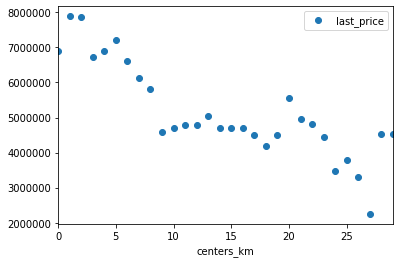

In [65]:
spb_cent_m2.plot(style='o')

Центральная зона находится на 8 км, так как на ем происходит  резкая разница в цене (1 000 000 рублей). Радиус центральной зоы составляет 8 км.

### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

In [66]:
spb_centr = spb[spb['centers_km'] <= 8] # Ограничили центр 8 километрами 
spb_centr.reset_index(drop=True, inplace=True)

In [67]:
spb_centr.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,living_area_ratio,kitchen_area_ratio,centers_km
count,1645.000000,1.645000e+03,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,...,1645.000000,1198.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000
mean,9.283891,6.902987e+06,59.570444,2.066869,2.658292,8.607903,34.020541,4.691793,10.663088,0.382979,...,1.207295,486.368114,190.573252,119620.967380,2.616413,6.545897,2017.153799,0.562646,0.187564,5.483283
std,5.516974,2.197236e+06,20.019707,0.904384,0.078613,4.869470,14.446606,3.471709,4.512982,0.767625,...,1.011585,256.471675,250.671291,28767.155471,1.745512,3.408857,1.061402,0.105733,0.076158,1.928274
min,0.000000,1.686000e+06,13.000000,0.000000,2.400000,2.000000,6.000000,1.000000,0.000000,0.000000,...,0.000000,22.000000,0.000000,26250.000000,0.000000,1.000000,2014.000000,0.158000,0.000000,0.000000
25%,5.000000,5.199000e+06,44.000000,1.000000,2.650000,5.000000,21.500000,2.000000,7.600000,0.000000,...,0.000000,281.250000,30.000000,99122.810000,1.000000,3.000000,2017.000000,0.506000,0.136000,4.000000
50%,9.000000,6.700000e+06,57.800000,2.000000,2.650000,7.000000,32.000000,4.000000,10.000000,0.000000,...,1.000000,470.000000,90.000000,115957.450000,3.000000,7.000000,2017.000000,0.565000,0.182000,6.000000
75%,13.000000,8.500000e+06,72.000000,3.000000,2.650000,11.000000,43.300000,6.000000,13.000000,0.000000,...,2.000000,668.000000,235.000000,137075.720000,4.000000,10.000000,2018.000000,0.638000,0.221000,7.000000
max,32.000000,1.176800e+07,114.200000,6.000000,2.880000,28.000000,90.200000,23.000000,40.200000,5.000000,...,3.000000,1199.000000,1477.000000,292307.690000,6.000000,12.000000,2019.000000,0.902000,0.613000,8.000000


#### Площадь квартир

In [68]:
spb_centr['total_area'].describe()

count    1645.000000
mean       59.570444
std        20.019707
min        13.000000
25%        44.000000
50%        57.800000
75%        72.000000
max       114.200000
Name: total_area, dtype: float64

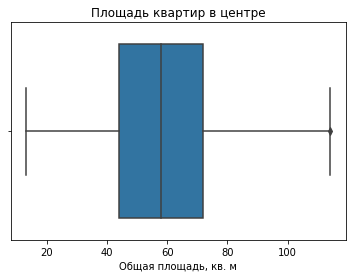

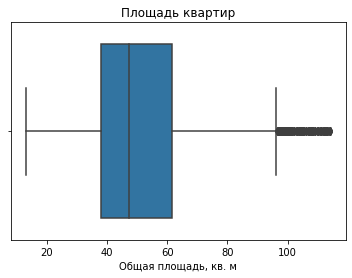

In [69]:
sns.boxplot(spb_centr['total_area'])
plt.title('Площадь квартир в центре')
plt.xlabel('Общая площадь, кв. м')
plt.show()

sns.boxplot(data_good['total_area'])
plt.title('Площадь квартир')
plt.xlabel('Общая площадь, кв. м')
plt.show()

#### Цена

count    1.645000e+03
mean     6.902987e+06
std      2.197236e+06
min      1.686000e+06
25%      5.199000e+06
50%      6.700000e+06
75%      8.500000e+06
max      1.176800e+07
Name: last_price, dtype: float64


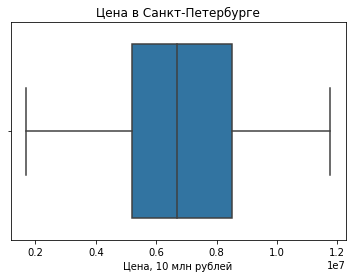

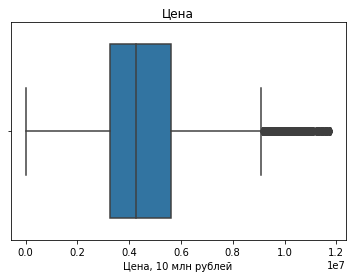

In [70]:
print(spb_centr['last_price'].describe())
sns.boxplot(spb_centr['last_price'])
plt.title('Цена в Санкт-Петербурге')
plt.xlabel('Цена, 10 млн рублей')
plt.show()
sns.boxplot(data_good['last_price'])
plt.title('Цена')
plt.xlabel('Цена, 10 млн рублей')
plt.show()

#### Число комнат

count    1645.000000
mean        2.066869
std         0.904384
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64


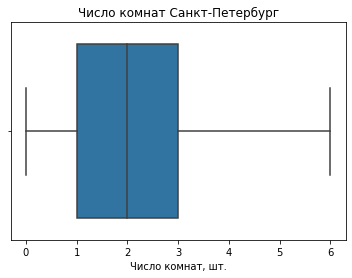

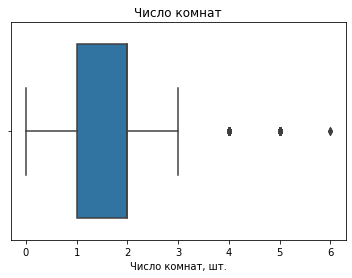

In [71]:
print(spb_centr['rooms'].describe())
sns.boxplot(spb_centr['rooms'])
plt.title('Число комнат Санкт-Петербург')
plt.xlabel('Число комнат, шт.')
plt.show()
sns.boxplot(data_good['rooms'])
plt.title('Число комнат')
plt.xlabel('Число комнат, шт.')
plt.show()

#### Высота потолков

count    1645.000000
mean        2.658292
std         0.078613
min         2.400000
25%         2.650000
50%         2.650000
75%         2.650000
max         2.880000
Name: ceiling_height, dtype: float64


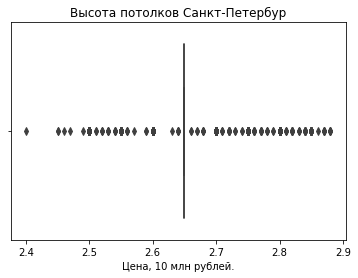

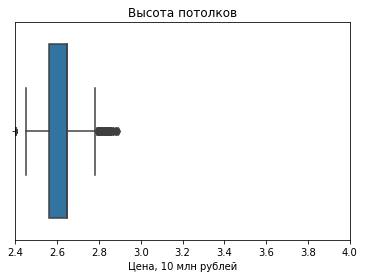

In [72]:
print(spb_centr['ceiling_height'].describe())
sns.boxplot(spb_centr['ceiling_height'])
plt.title('Высота потолков Санкт-Петербур')
plt.xlabel('Цена, 10 млн рублей.')
plt.show()
sns.boxplot(data_good['ceiling_height'])
plt.title('Высота потолков')
plt.xlim(2.4, 4.0)
plt.xlabel('Цена, 10 млн рублей')
plt.show()

#### Число комнат, этаж, удалённость от центра, дата размещения объявления

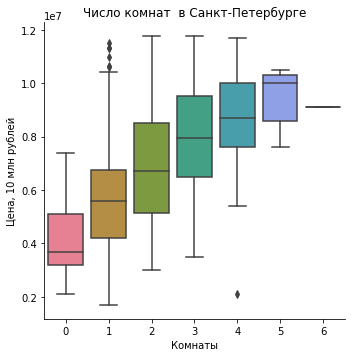

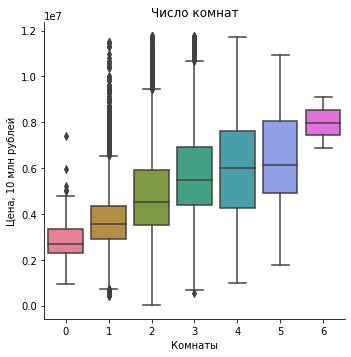

In [73]:
sns.catplot(x='rooms', y="last_price", kind="box", data=spb_centr, palette='husl')
plt.title('Число комнат  в Санкт-Петербурге')
plt.xlabel('Комнаты')
plt.ylabel('Цена, 10 млн рублей')
plt.show()
sns.catplot(x='rooms', y="last_price", kind="box", data=data_good, palette='husl')
plt.title('Число комнат')
plt.xlabel('Комнаты')
plt.ylabel('Цена, 10 млн рублей')
plt.show()

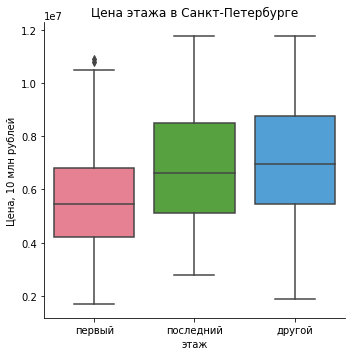

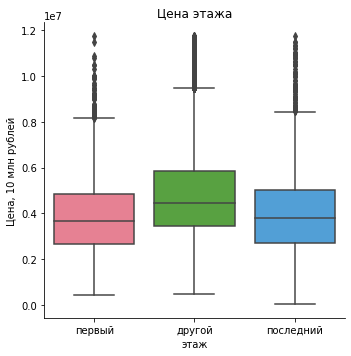

In [74]:
sns.catplot(x='floor_category', y="last_price", kind="box", data=spb_centr, palette='husl')
plt.title('Цена этажа в Санкт-Петербурге')
plt.xlabel('этаж')
plt.ylabel('Цена, 10 млн рублей')
plt.show()
sns.catplot(x='floor_category', y="last_price", kind="box", data=data_good, palette='husl')
plt.title('Цена этажа')
plt.xlabel('этаж')
plt.ylabel('Цена, 10 млн рублей')
plt.show()

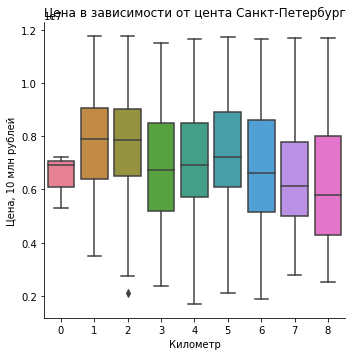

In [75]:
sns.catplot(x='centers_km', y="last_price", kind="box", data=spb_centr, palette='husl')
plt.title('Цена в зависимости от цента Санкт-Петербург')
plt.xlabel('Километр')
plt.ylabel('Цена, 10 млн рублей')
plt.show()

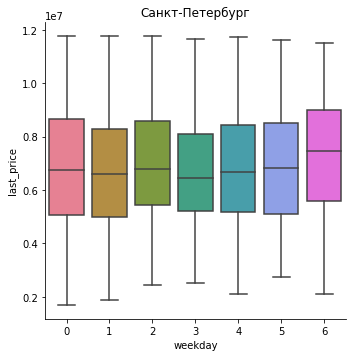

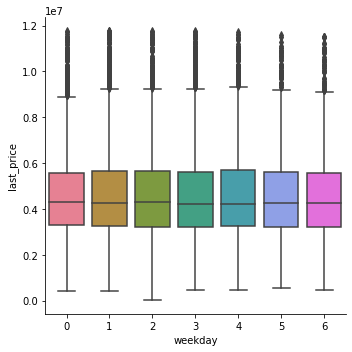

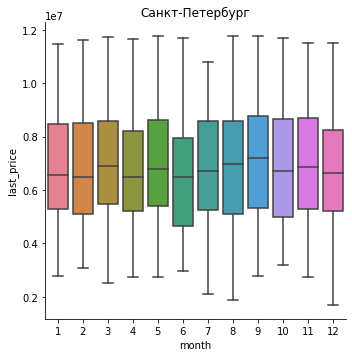

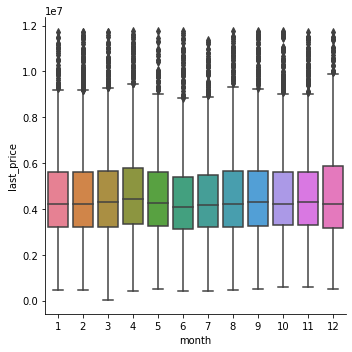

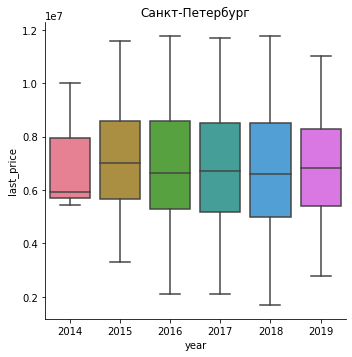

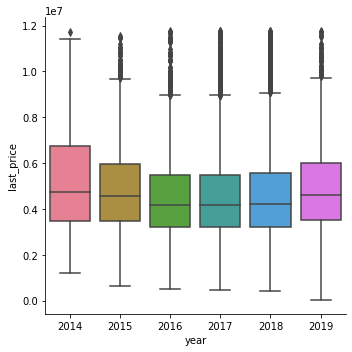

In [76]:
for column in ['weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=spb_centr, palette='husl')
    plt.title('Санкт-Петербург')
    plt.show()
    sns.catplot(x=column, y="last_price", kind="box", data=data_good, palette='husl')

Выводы:

Площадь квартир в центре Санкт-Петербурга больше, чем в остальных районах в 1,5 раза
Цена квартир в центре Санкт-Петербурга так же выше, чем в остальных районах
Квартиры в центре имеют большее количество комнат
Высота потолков в центре выше
Динамика цен с увеличением количества комнат в целом одинакова
Отличе в цене за последние этажи в центре, чем выше, тем больше шансов иметь красивый вид
Цена в зависимости от удаленности от центра снижается
События 2014 года меньше повлияли на стоимость недвижимости в центре, объясняется это более высокой стоимостью недвижимостью в нем и как следствие доступностью покупки.

## Общий вывод

# Для оценки рыночной стоимости недвижимости важны следующие параметры:
- общая площадь квартиры (аномальные значения: более 114,25 кв. м)
- расстояние до центра города (центр города ограничен окружностью радиусом 8 км)
- число комнат влияет на площадь квартиры
- первые этажи стоят де,шевле высокий этаж ценится ближе к центру.
- высокие потолки более привлекательнее и таких квартир больше в центре.
- правильная оценка недвижимости сказывается на сроке продажи квартиры.( 200 дней это уже большой срок продажи, но есть случаи, что квартира продавалась более года)

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод